In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings'] - 1  # Adjust target labels to start from 0
    return X, y

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a model, returning accuracy and F1 score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

def boosting_experiment(X, y, n_experiments=10):
    """
    Run multiple experiments to compare accuracy of XGBoost and Gradient Boosting,
    and calculate the average accuracy and F1 score.
    """
    xgb_accuracies, xgb_f1_scores = [], []
    gb_accuracies, gb_f1_scores = [], []

    # Run multiple experiments
    for i in range(n_experiments):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Initialize models
        xgb_model = XGBClassifier(max_depth=5,subsample=0.9, random_state=1, eval_metric='mlogloss')
        gb_model = GradientBoostingClassifier(random_state=1)

        # Evaluate XGBoost
        xgb_accuracy, xgb_f1 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
        xgb_accuracies.append(xgb_accuracy)
        xgb_f1_scores.append(xgb_f1)

        # Evaluate Gradient Boosting
        gb_accuracy, gb_f1 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
        gb_accuracies.append(gb_accuracy)
        gb_f1_scores.append(gb_f1)

    # Calculate average scores
    avg_xgb_accuracy = np.mean(xgb_accuracies)
    avg_xgb_f1 = np.mean(xgb_f1_scores)
    avg_gb_accuracy = np.mean(gb_accuracies)
    avg_gb_f1 = np.mean(gb_f1_scores)

    print(f"XGBoost - Average Accuracy: {avg_xgb_accuracy:.4f}, Average F1 Score: {avg_xgb_f1:.4f}")
    print(f"Gradient Boosting - Average Accuracy: {avg_gb_accuracy:.4f}, Average F1 Score: {avg_gb_f1:.4f}")

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    boosting_experiment(X, y, n_experiments=10)


XGBoost - Average Accuracy: 0.6169, Average F1 Score: 0.6104
Gradient Boosting - Average Accuracy: 0.6257, Average F1 Score: 0.6144


XGBoost - Average Accuracy: 0.6158, Average F1 Score: 0.6097
Gradient Boosting - Average Accuracy: 0.6264, Average F1 Score: 0.6152


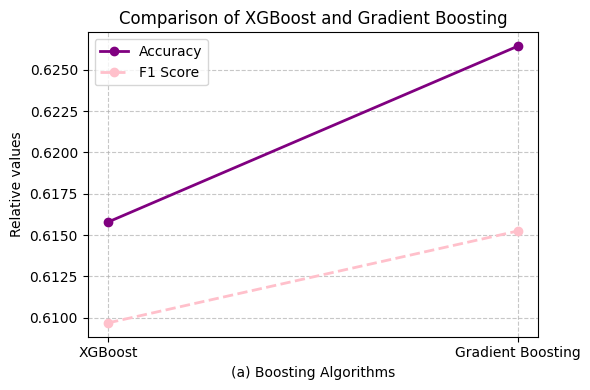

In [7]:
# no hyperparameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings'] - 1  # Adjust target labels to start from 0
    return X, y

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a model, returning accuracy and F1 score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

def boosting_experiment(X, y, n_experiments=10):
    """
    Run multiple experiments to compare accuracy of XGBoost and Gradient Boosting,
    and calculate the average accuracy and F1 score.
    """
    xgb_accuracies, xgb_f1_scores = [], []
    gb_accuracies, gb_f1_scores = [], []

    # Run multiple experiments
    for i in range(n_experiments):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Initialize models
        xgb_model = XGBClassifier(max_depth=5, subsample=0.9, random_state=1, eval_metric='mlogloss')
        gb_model = GradientBoostingClassifier(random_state=1)

        # Evaluate XGBoost
        xgb_accuracy, xgb_f1 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
        xgb_accuracies.append(xgb_accuracy)
        xgb_f1_scores.append(xgb_f1)

        # Evaluate Gradient Boosting
        gb_accuracy, gb_f1 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
        gb_accuracies.append(gb_accuracy)
        gb_f1_scores.append(gb_f1)

    # Calculate average scores
    avg_xgb_accuracy = np.mean(xgb_accuracies)
    avg_xgb_f1 = np.mean(xgb_f1_scores)
    avg_gb_accuracy = np.mean(gb_accuracies)
    avg_gb_f1 = np.mean(gb_f1_scores)

    print(f"XGBoost - Average Accuracy: {avg_xgb_accuracy:.4f}, Average F1 Score: {avg_xgb_f1:.4f}")
    print(f"Gradient Boosting - Average Accuracy: {avg_gb_accuracy:.4f}, Average F1 Score: {avg_gb_f1:.4f}")

    # Plot results
    labels = ['XGBoost', 'Gradient Boosting']
    accuracies = [avg_xgb_accuracy, avg_gb_accuracy]
    f1_scores = [avg_xgb_f1, avg_gb_f1]

    plt.figure(figsize=(6, 4))
    plt.plot(labels, accuracies, marker='o', color='purple', label='Accuracy', linewidth=2)
    plt.plot(labels, f1_scores, marker='o', linestyle='--', color='pink', label='F1 Score', linewidth=2)
    plt.xlabel('(a) Boosting Algorithms')
    plt.ylabel('Relative values')
    plt.title('Comparison of XGBoost and Gradient Boosting')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig("boosting_comparison.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    boosting_experiment(X, y, n_experiments=10)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings'] - 1  # Adjust target labels to start from 0
    return X, y

def search_best_params(X, y, search_type="grid"):
    """
    Perform parameter search for XGBoost using GridSearchCV or RandomizedSearchCV.

    Parameters:
    - X: Features
    - y: Target
    - search_type: 'grid' for GridSearchCV, 'random' for RandomizedSearchCV
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid or distributions for RandomizedSearchCV
    param_grid = {
        'max_depth': [3, 5],
        'learning_rate': [0.1],
        'n_estimators': [50, 100],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6],
        'gamma': [0, 0.1],
        'min_child_weight': [1]
    }

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(tree_method='gpu_hist', random_state=42, eval_metric='mlogloss')

    # Define scoring metric
    scoring = {'Accuracy': make_scorer(accuracy_score), 'F1': make_scorer(f1_score, average='weighted')}

    # Choose search type
    if search_type == "grid":
        search = GridSearchCV(
            estimator=xgb_model,
            param_grid=param_grid,
            scoring=scoring,
            refit='F1',  # Choose 'F1' as the metric to optimize
            cv=3,
            verbose=2,
            n_jobs=-1
        )
    else:
        search = RandomizedSearchCV(
            estimator=xgb_model,
            param_distributions=param_grid,
            scoring=scoring,
            refit='F1',  # Choose 'F1' as the metric to optimize
            early_stopping_rounds=10,
            cv=3,
            verbose=2,
            n_jobs=-1,
            n_iter=20  # Number of parameter settings sampled in random search
        )

    # Perform the search
    search.fit(X_train, y_train)

    # Best parameters and score
    print("Best Parameters:", search.best_params_)
    print("Best F1 Score:", search.best_score_)

    # Evaluate the best model on test set
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1:.4f}")

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    search_best_params(X, y, search_type="grid")  # Change to "random" for RandomizedSearchCV


Fitting 3 folds for each of 16 candidates, totalling 48 fits


d:\python3.10\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.6272279725478652
Test Accuracy: 0.6567, Test F1 Score: 0.6447


d:\python3.10\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
d:\python3.10\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_

XGBoost - Average Accuracy: 0.6370, Average F1 Score: 0.6232
Gradient Boosting - Average Accuracy: 0.6264, Average F1 Score: 0.6152


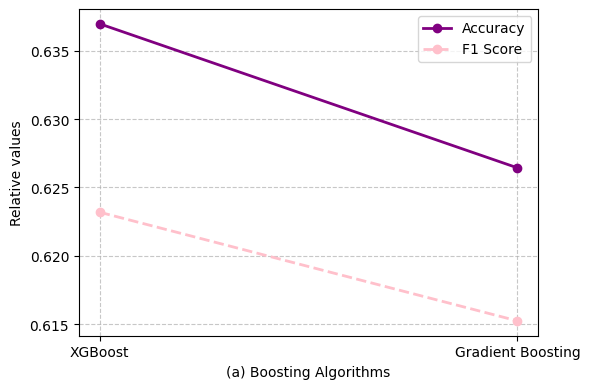

In [14]:
# no hyperparameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings'] - 1  # Adjust target labels to start from 0
    return X, y

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a model, returning accuracy and F1 score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

def boosting_experiment(X, y, n_experiments=10):
    """
    Run multiple experiments to compare accuracy of XGBoost and Gradient Boosting,
    and calculate the average accuracy and F1 score.
    """
    xgb_accuracies, xgb_f1_scores = [], []
    gb_accuracies, gb_f1_scores = [], []

    # Run multiple experiments
    for i in range(n_experiments):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Initialize models
        xgb_model = XGBClassifier(
    max_depth=3, 
    gamma=0,
    learning_rate=0.1,            # Lower learning rate for more gradual learning
    n_estimators=100,             # Increase estimators as learning rate decreases
    subsample=0.8,                # Use 80% of data to reduce overfitting
    colsample_bytree=0.6,         # Use 80% of features for each tree
    min_child_weight=1,           # Adjust to control tree size
    eval_metric='mlogloss'        # Metric for evaluation
)
        gb_model = GradientBoostingClassifier( max_depth=3,    learning_rate=0.1,n_estimators=100,random_state=1)

        # Evaluate XGBoost
        xgb_accuracy, xgb_f1 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
        xgb_accuracies.append(xgb_accuracy)
        xgb_f1_scores.append(xgb_f1)

        # Evaluate Gradient Boosting
        gb_accuracy, gb_f1 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
        gb_accuracies.append(gb_accuracy)
        gb_f1_scores.append(gb_f1)

    # Calculate average scores
    avg_xgb_accuracy = np.mean(xgb_accuracies)
    avg_xgb_f1 = np.mean(xgb_f1_scores)
    avg_gb_accuracy = np.mean(gb_accuracies)
    avg_gb_f1 = np.mean(gb_f1_scores)

    print(f"XGBoost - Average Accuracy: {avg_xgb_accuracy:.4f}, Average F1 Score: {avg_xgb_f1:.4f}")
    print(f"Gradient Boosting - Average Accuracy: {avg_gb_accuracy:.4f}, Average F1 Score: {avg_gb_f1:.4f}")

    # Plot results
    labels = ['XGBoost', 'Gradient Boosting']
    accuracies = [avg_xgb_accuracy, avg_gb_accuracy]
    f1_scores = [avg_xgb_f1, avg_gb_f1]

    plt.figure(figsize=(6, 4))
    plt.plot(labels, accuracies, marker='o', color='purple', label='Accuracy', linewidth=2)
    plt.plot(labels, f1_scores, marker='o', linestyle='--', color='pink', label='F1 Score', linewidth=2)
    plt.xlabel('(a) Boosting Algorithms')
    plt.ylabel('Relative values')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig("boosting_comparison.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    boosting_experiment(X, y, n_experiments=10)
